Final Project of Machine Learning course.
Machine recognition of hand-written characters.
By Mario Jiménez and Manuel Hernández

In this project we are facing the challenge of recognizing hand-written digits vía Machine Learning

We will use a standard multi-class classification Neural Network with 3 layers (input, hidden, output) to clasify 8x8 input images.

Input images are, at start, 32 x 32 normalized bitmaps with pixel values 0 or 1 (0 for non written and 1 for written). Those are then divided into 4x4 non interpolated regions which give the result 8x8 images with pixel values from 0 to 16. 

Those 8x8 images are the ones we will work with.

In [41]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import csv

In [42]:
def displayData(X):
    num_plots = int(np.size(X, 0)**.5)
    fig, ax = plt.subplots(num_plots, num_plots, sharex=True, sharey=True)
    plt.subplots_adjust(left=0, wspace=0, hspace=0)
    img_num = 0
    for i in range(num_plots):
        for j in range(num_plots):
            # Convert column vector into 20x20 pixel matrix
            # transpose
            img = X[img_num, :].reshape(8, 8).T
            ax[i][j].imshow(img, cmap='Greys')
            ax[i][j].set_axis_off()
            img_num += 1

    return (fig, ax)

def displayImage(im):
    fig2, ax2 = plt.subplots()
    image = im.reshape(8, 8)
    ax2.imshow(image, cmap='gray')
    return (fig2, ax2)

# Logistic Regresion Functions


In [43]:
#Used as activation function with Neural nertworks
def sigmoid (z):
    return 1.0/(1.0 + np.exp(-z))

def costFunc(thetas, X, Y):
    H = sigmoid(np.dot(X, thetas))       
    oper1 = -(float(1)/len(X))
    oper2 = np.dot((np.log(H)).T, Y)      
    oper3 = (np.log(1-H)).T                     
    oper4 = 1-Y
    return oper1 * (oper2 + np.dot(oper3, oper4))

#Gradient descent algorithm
def alg_gradDesc(thetas, X, Y):
    H = sigmoid(np.dot(X, thetas))  
    return np.dot((1.0/len(X)), X.T).dot(H-Y)

def alg_desGrad_reg(thetas, X, Y, _lambda):
    H = sigmoid(np.dot(X, thetas))  
    return (np.dot((1.0/len(X)), X.T).dot(H-Y))+(_lambda/len(X))*thetas

def costFunc_reg(thetas, X, Y, _lambda):
    H = sigmoid(np.dot(X, thetas))       
    oper1 = -(float(1)/len(X))
    oper2 = np.dot((np.log(H)).T, Y)      
    oper3 = (np.log(1-H)).T                     
    oper4 = 1-Y
    oper5 = (_lambda/(2*len(X)))*np.sum(thetas**2)
    return (oper1 * (oper2 + np.dot(oper3, oper4)))+ oper5

def oneVsAll(X, Y, num_etiquetas, reg):
    thetas = np.zeros([num_etiquetas, X.shape[1]]) #Thetas es un vector de shape (num_etiquetas, 401)

    for i in range(num_etiquetas):
        if(i == 0):
             iaux = 10
        else:
            iaux = i
        
        a = (Y == iaux)*1
        thetas[i] = scopt.fmin_tnc(fun_coste_regularizada, thetas[i], alg_desGrad_reg,args = (X, a, reg))[0]
        
    return thetas

We start getting the data:

In [37]:
file = open('Data/optdigits.tra', encoding ="utf8", errors = "ignore")
data = csv.reader(file)
lines = np.array(list(data))

X_input = np.array(lines[:,:-1], dtype = np.int)
Y_input = np.array(lines [:,-1:], dtype = np.int)

numCases = len (X_input)
#print(X_input.shape)


[[ 0  0  5 ...  0  0  0]
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ... 16  9  0]
 ...
 [ 0  0  1 ...  6  0  0]
 [ 0  0  2 ... 12  0  0]
 [ 0  0 10 ... 12  1  0]]


# Neural Network Functions

In [44]:
def sigmoidDerivative(z):
    return sigmoid(z)*(1-sigmoid(z))

#hypothesis function for a 3 layer neuronal network
def hypothesis(thetas1, thetas2, X):
    return sigmoid(thetas2.dot(sigmoid(thetas1.dot(X))))    

#Cost Function
def NN_cost (theta1, theta2, X, Y, reg):    
    return 0


Here we obtain the data to use it. It comes in an (Ncases, 64) array. 
Each case consists of 64 values from 0 to 16.
Then, we normalize it to the interval [0.0, 1.0]
Y array comes in form (Ncases, 1).Each value in Y is between 0 and 9. Indicating which number is written.
To operate with it, Y must be converted to a (nCases, nClases) array. 
Each row will contain 10 values. All set to 0 except the case that is true for that number. E.g. If the number written is '0', `Y[0]` will be `true` and the rest will be `false`

10


<IPython.core.display.Javascript object>


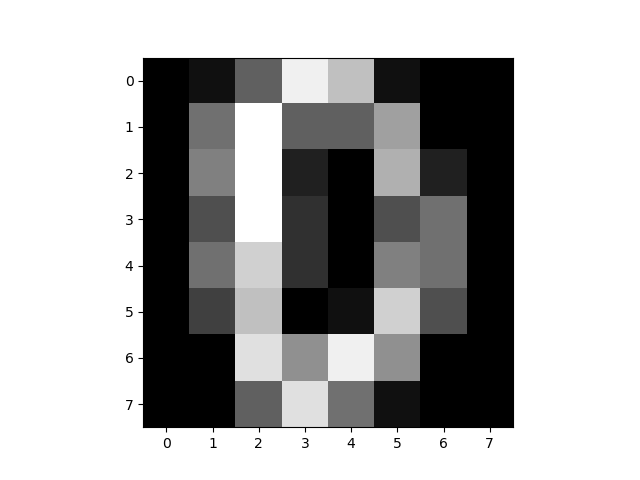

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2bab81dcef0>)

In [48]:
file = open('Data/optdigits.tra', encoding ="utf8", errors = "ignore")
data = csv.reader(file)
lines = np.array(list(data))

X_input = np.array(lines[:,:-1], dtype = np.int)
Y_input = np.array(lines [:,-1:], dtype = np.int)

numCases = len (X_input)
numTags = len(np.unique(Y_input))

print (numTags)
#X matrix with normalized values from [0, 16] to [0.0, 1.0]

X_N = X_input/16.0

X_ones = np.hstack([np.ones((len(X_input), 1), dtype = np.int), X_input])
Y_real = np.zeros((numCases, numTags), dtype = np.int)
for n in range(numCases):
    Y_real[n][Y_input[n]] = 1
    
#thetas1 = np.zeros((len(X_input), 1)
    
    
displayImage(X_N[0])

We will be operating a 3 layer NN. 
- 1 input layer
- 1 hidden layer
- 1 output layer

# Anex
- How many hidden layers should my NN have?
http://www.faqs.org/faqs/ai-faq/neural-nets/part3/section-9.html
https://towardsdatascience.com/beginners-ask-how-many-hidden-layers-neurons-to-use-in-artificial-neural-networks-51466afa0d3e
- How many nodes should the hidden layer of my NN have?
http://www.faqs.org/faqs/ai-faq/neural-nets/part3/section-10.html